In [1]:
# import data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
for dirname, _, filenames in os.walk('/Users/yongxingnie/Desktop/data science methods and tools/assignment3/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/yongxingnie/Desktop/data science methods and tools/assignment3/data/.DS_Store
/Users/yongxingnie/Desktop/data science methods and tools/assignment3/data/Breast Cancer Wisconsin Dataset.csv
/Users/yongxingnie/Desktop/data science methods and tools/assignment3/data/IRIS.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data='/Users/yongxingnie/Desktop/data science methods and tools/assignment3/data/Breast Cancer Wisconsin Dataset.csv'
df=pd.DataFrame(pd.read_csv(data))

In [4]:
# Dropping the standard error and worst values of each feature, only the mean values of each feature is used in the model trainning
df.drop(['radius_se', 'texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst','Unnamed: 32'], axis=1, inplace=True)
df.drop(['id'], axis=1, inplace=True)
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  
0         0.2419                 0.07871  
1         0.1812                 0.05667  
2         0.2069                 0.05999  
3         0.2597                 0.09744  
4         0.1809                 0.05883

In [5]:
# Altering the name of each column for readibility.
col_names=['diagnosis','radius','texture','perimeter','area','smoothness','compactness','concavity','concave_points'
         ,'symmetry','fractal_dimension']
df.columns=col_names
df.columns

Index(['diagnosis', 'radius', 'texture', 'perimeter', 'area', 'smoothness',
       'compactness', 'concavity', 'concave_points', 'symmetry',
       'fractal_dimension'],
      dtype='object')

In [6]:
# Labeling the target diagnosis as 0 or 1.
df['diagnosis']=df['diagnosis'].map({'B':0,'M':1})
df.head()

diagnosis  radius  texture  perimeter    area  smoothness  compactness  \
0          1   17.99    10.38     122.80  1001.0     0.11840      0.27760   
1          1   20.57    17.77     132.90  1326.0     0.08474      0.07864   
2          1   19.69    21.25     130.00  1203.0     0.10960      0.15990   
3          1   11.42    20.38      77.58   386.1     0.14250      0.28390   
4          1   20.29    14.34     135.10  1297.0     0.10030      0.13280   

   concavity  concave_points  symmetry  fractal_dimension  
0     0.3001         0.14710    0.2419            0.07871  
1     0.0869         0.07017    0.1812            0.05667  
2     0.1974         0.12790    0.2069            0.05999  
3     0.2414         0.10520    0.2597            0.09744  
4     0.1980         0.10430    0.1809            0.05883

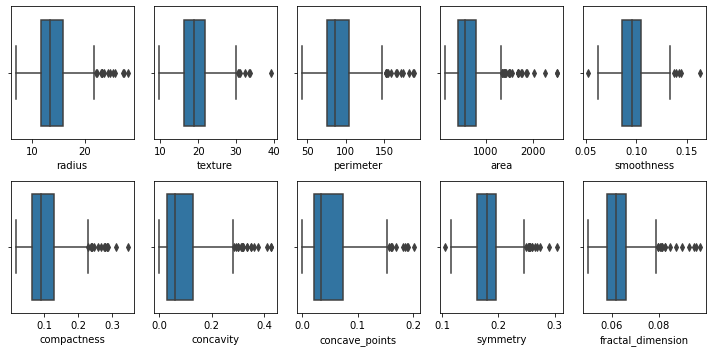

In [7]:
# Removing outliers
fig, axs = plt.subplots(2,5, figsize = (10,5))
plt1 = sns.boxplot(df['radius'], ax = axs[0,0])
plt2 = sns.boxplot(df['texture'], ax = axs[0,1])
plt3 = sns.boxplot(df['perimeter'], ax = axs[0,2])
plt4 = sns.boxplot(df['area'], ax = axs[0,3])
plt5 = sns.boxplot(df['smoothness'], ax = axs[0,4])
plt1 = sns.boxplot(df['compactness'], ax = axs[1,0])
plt2 = sns.boxplot(df['concavity'], ax = axs[1,1])
plt3 = sns.boxplot(df['concave_points'], ax = axs[1,2])
plt4 = sns.boxplot(df['symmetry'], ax = axs[1,3])
plt5 = sns.boxplot(df['fractal_dimension'], ax = axs[1,4])

plt.tight_layout()

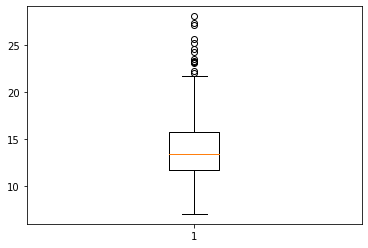

In [8]:
plt.boxplot(df.radius)
Q1 = df.radius.quantile(0.25)
Q3 = df.radius.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.radius >= Q1 - 1.5*IQR) & (df.radius <= Q3 + 1.5*IQR)]

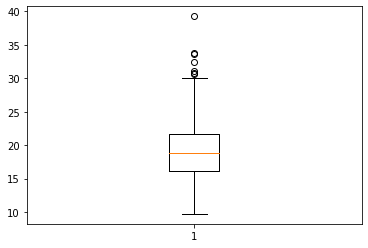

In [9]:
plt.boxplot(df.texture)
Q1 = df.texture.quantile(0.25)
Q3 = df.texture.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.texture >= Q1 - 1.5*IQR) & (df.texture <= Q3 + 1.5*IQR)]

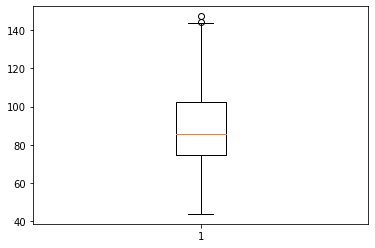

In [10]:
plt.boxplot(df.perimeter)
Q1 = df.perimeter.quantile(0.25)
Q3 = df.perimeter.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.perimeter >= Q1 - 1.5*IQR) & (df.perimeter <= Q3 + 1.5*IQR)]

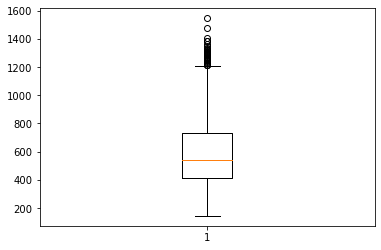

In [11]:
plt.boxplot(df.area)
Q1 = df.area.quantile(0.25)
Q3 = df.area.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.area >= Q1 - 1.5*IQR) & (df.area <= Q3 + 1.5*IQR)]

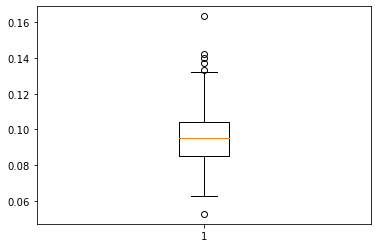

In [12]:
plt.boxplot(df.smoothness)
Q1 = df.smoothness.quantile(0.25)
Q3 = df.smoothness.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.smoothness >= Q1 - 1.5*IQR) & (df.smoothness <= Q3 + 1.5*IQR)]

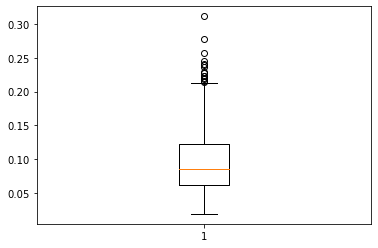

In [13]:
plt.boxplot(df.compactness)
Q1 = df.compactness.quantile(0.25)
Q3 = df.compactness.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.compactness >= Q1 - 1.5*IQR) & (df.compactness <= Q3 + 1.5*IQR)]

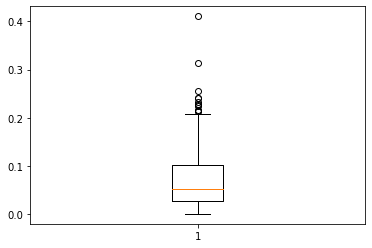

In [14]:
plt.boxplot(df.concavity)
Q1 = df.concavity.quantile(0.25)
Q3 = df.concavity.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.concavity >= Q1 - 1.5*IQR) & (df.concavity <= Q3 + 1.5*IQR)]

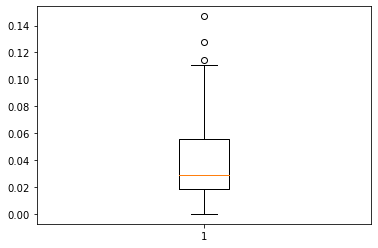

In [15]:
plt.boxplot(df.concave_points)
Q1 = df.concave_points.quantile(0.25)
Q3 = df.concave_points.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.concave_points >= Q1 - 1.5*IQR) & (df.concave_points <= Q3 + 1.5*IQR)]

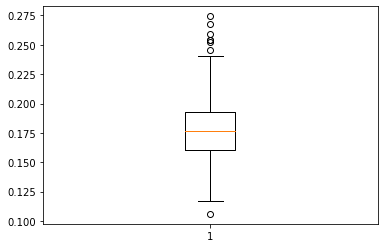

In [16]:
plt.boxplot(df.symmetry)
Q1 = df.symmetry.quantile(0.25)
Q3 = df.symmetry.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.symmetry >= Q1 - 1.5*IQR) & (df.symmetry <= Q3 + 1.5*IQR)]


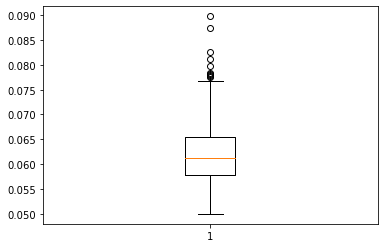

In [17]:
plt.boxplot(df.fractal_dimension)
Q1 = df.fractal_dimension.quantile(0.25)
Q3 = df.fractal_dimension.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.fractal_dimension >= Q1 - 1.5*IQR) & (df.fractal_dimension <= Q3 + 1.5*IQR)]

In [18]:
df.shape

(458, 11)

In [19]:
df.head()

diagnosis  radius  texture  perimeter    area  smoothness  compactness  \
5           1   12.45    15.70      82.57   477.1     0.12780      0.17000   
6           1   18.25    19.98     119.60  1040.0     0.09463      0.10900   
7           1   13.71    20.83      90.20   577.9     0.11890      0.16450   
8           1   13.00    21.82      87.50   519.8     0.12730      0.19320   
10          1   16.02    23.24     102.70   797.8     0.08206      0.06669   

    concavity  concave_points  symmetry  fractal_dimension  
5     0.15780         0.08089    0.2087            0.07613  
6     0.11270         0.07400    0.1794            0.05742  
7     0.09366         0.05985    0.2196            0.07451  
8     0.18590         0.09353    0.2350            0.07389  
10    0.03299         0.03323    0.1528            0.05697

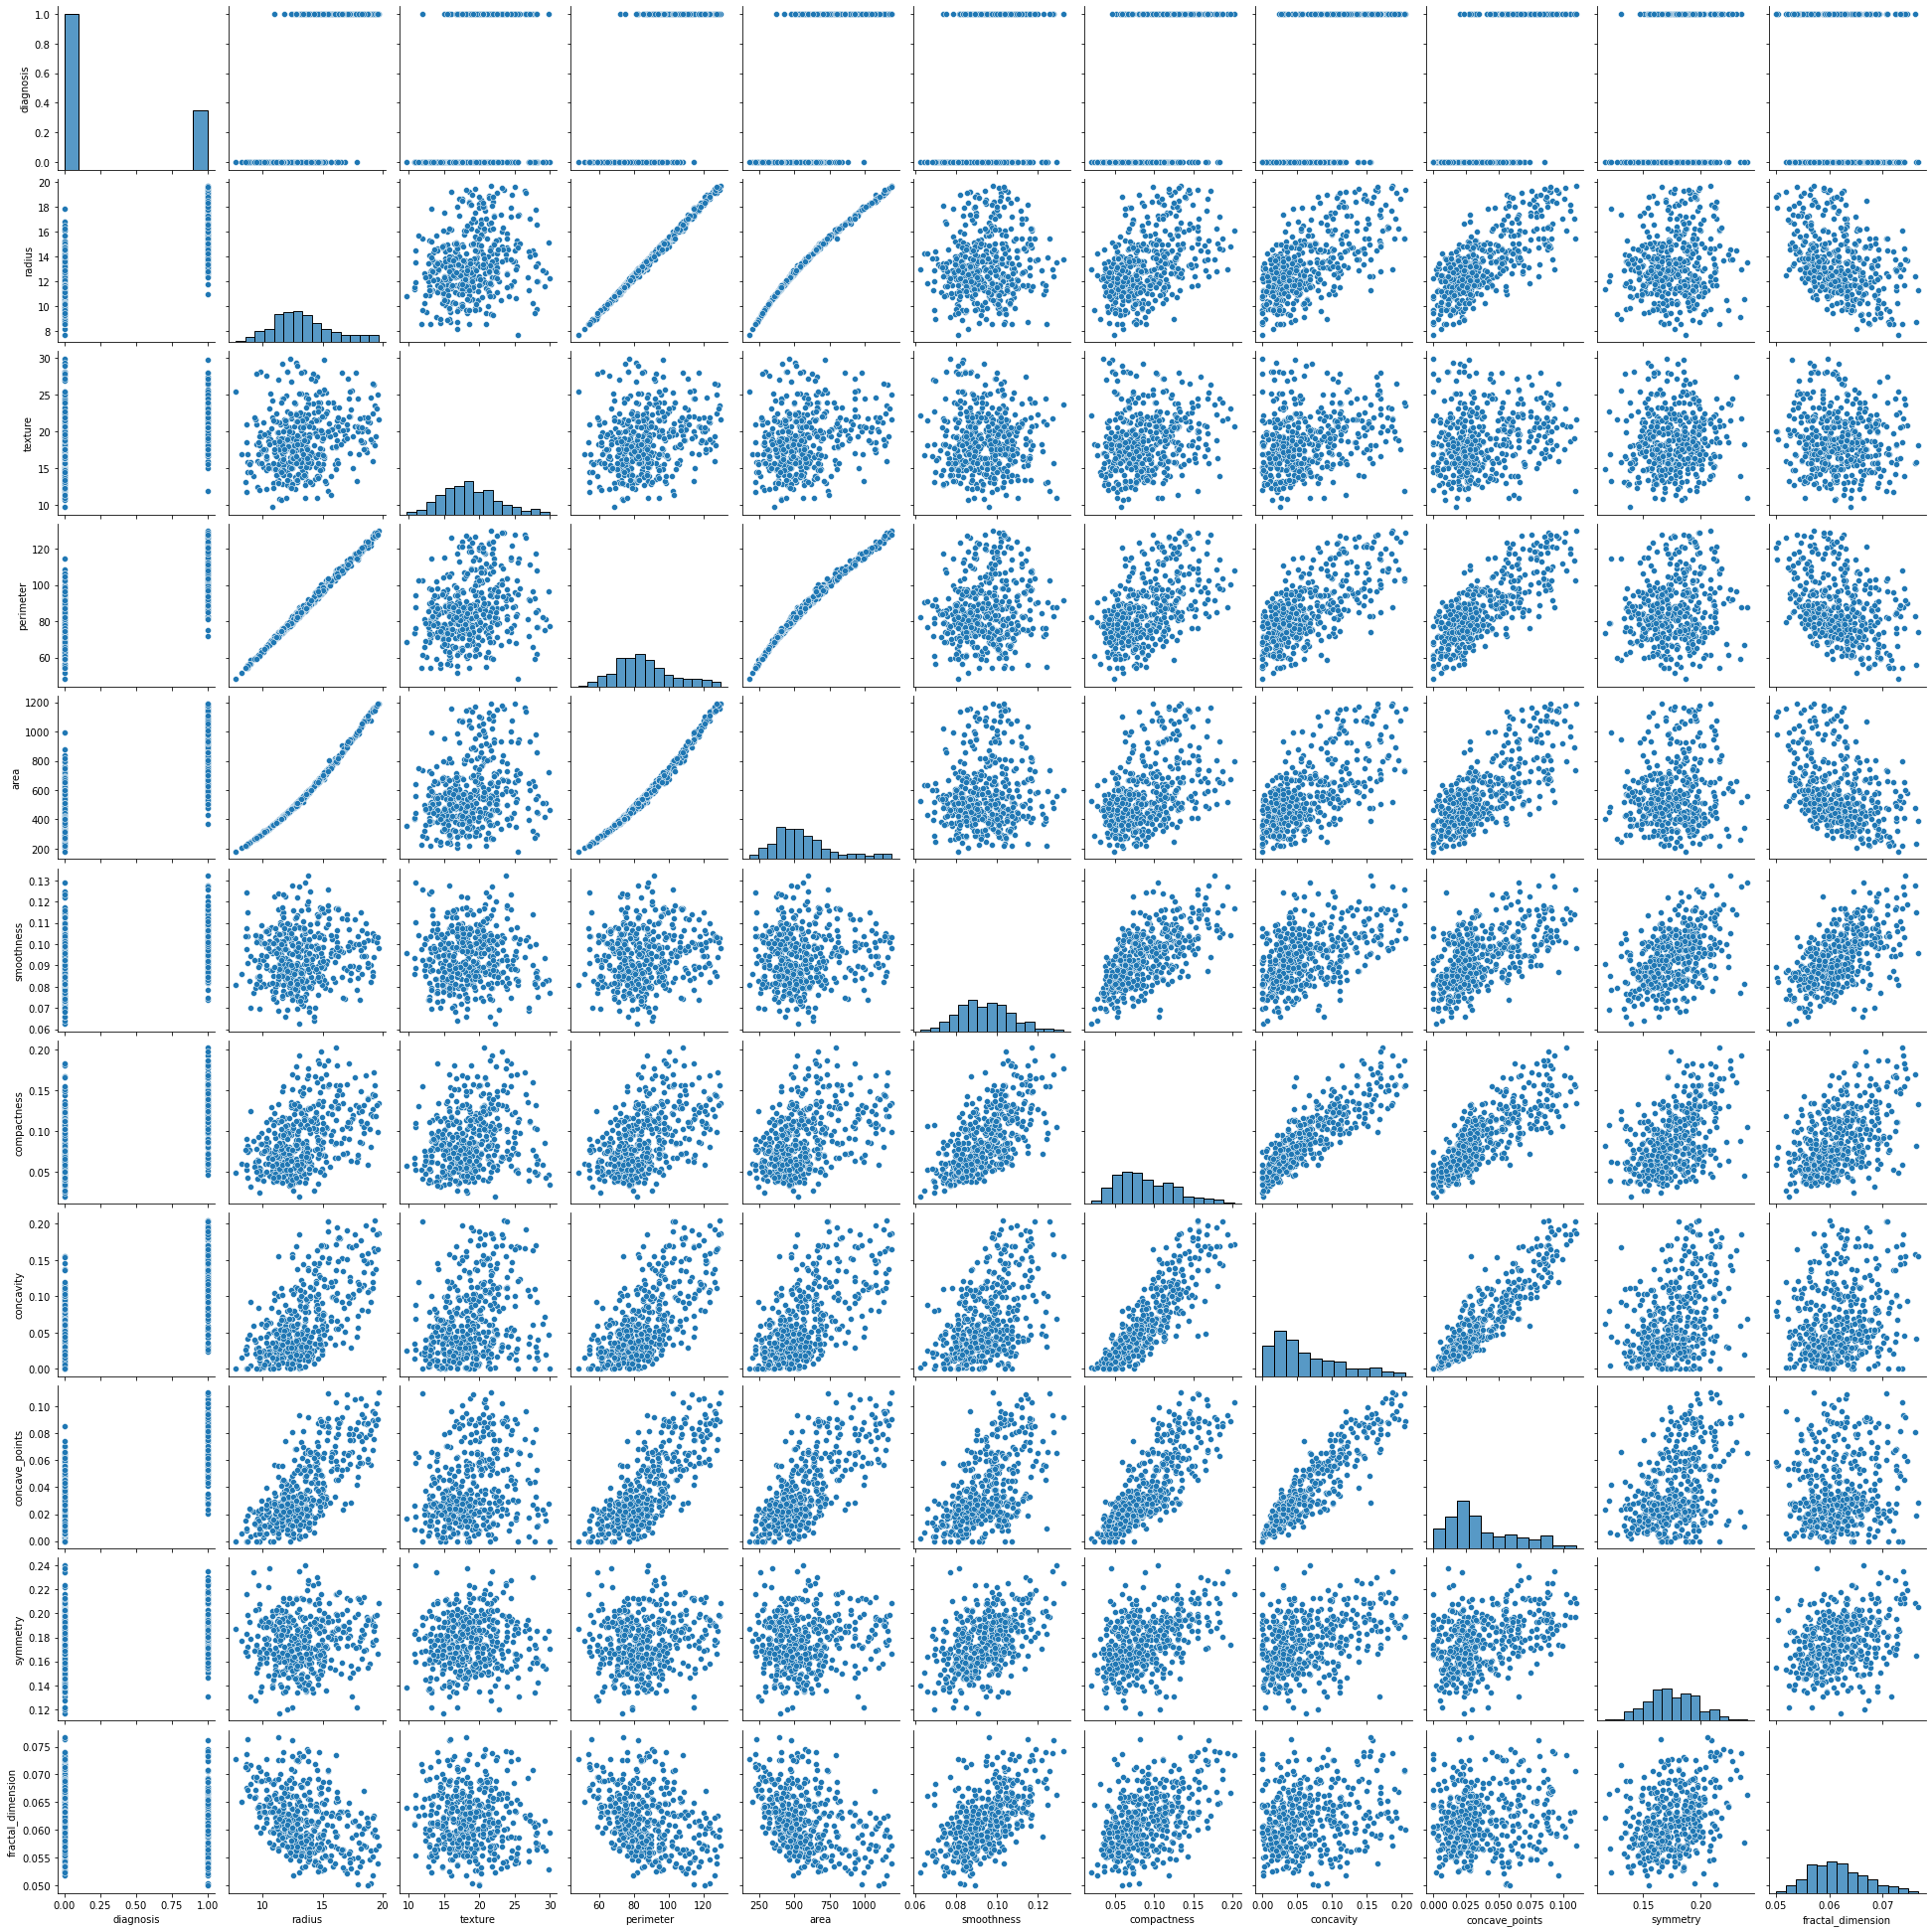

In [20]:
# Explore the distribution of the data
sns.pairplot(df)

In [21]:
# Normalizing the data
y=df.diagnosis
x=df.drop('diagnosis', axis=1)
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = preprocessing.StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
x_scaled = pd.DataFrame(x_scaled)
x_scaled.info

<bound method DataFrame.info of             0         1         2         3         4         5         6  \
0   -0.359470 -0.770866 -0.219456 -0.416640  2.664545  2.195372  1.889695   
1    1.973739  0.320610  1.975060  2.148809  0.041110  0.539691  0.981024   
2    0.147400  0.537375  0.232722  0.042761  1.960638  2.046089  0.597408   
3   -0.138217  0.789842  0.072711 -0.222033  2.624999  2.825073  2.455851   
4    1.076660  1.151967  0.973512  1.044969 -0.953059 -0.608699 -0.624966   
..        ...       ...       ...       ...       ...       ...       ...   
453 -1.577164  2.335249 -1.600881 -1.354586 -1.018704 -1.069576 -1.289645   
454  0.501404  1.009157  0.599561  0.403720 -0.741887  1.191107  0.783575   
455 -0.737611  1.327929 -0.696525 -0.752077 -0.118653  0.352410  0.950802   
456  0.284174  2.149086  0.302652  0.145307  0.409672  0.637404 -0.390646   
457  1.309981  2.386253  1.305386  1.319789 -0.756123  0.357838  0.574238   

            7         8         9  
0    1.

In [22]:
# Although we already know that the final clustering should be 2, malignant or benign,
# we still need to testify it firstly if 2 is the best clustering numbers
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score

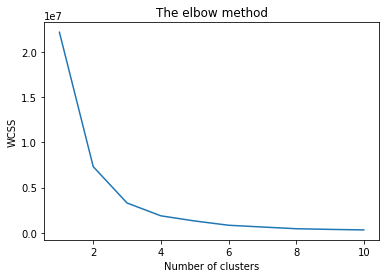

In [23]:
# Find the optimum cluster numbers for K-means.
wcss = []
# Sum of squares within the cluster.

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

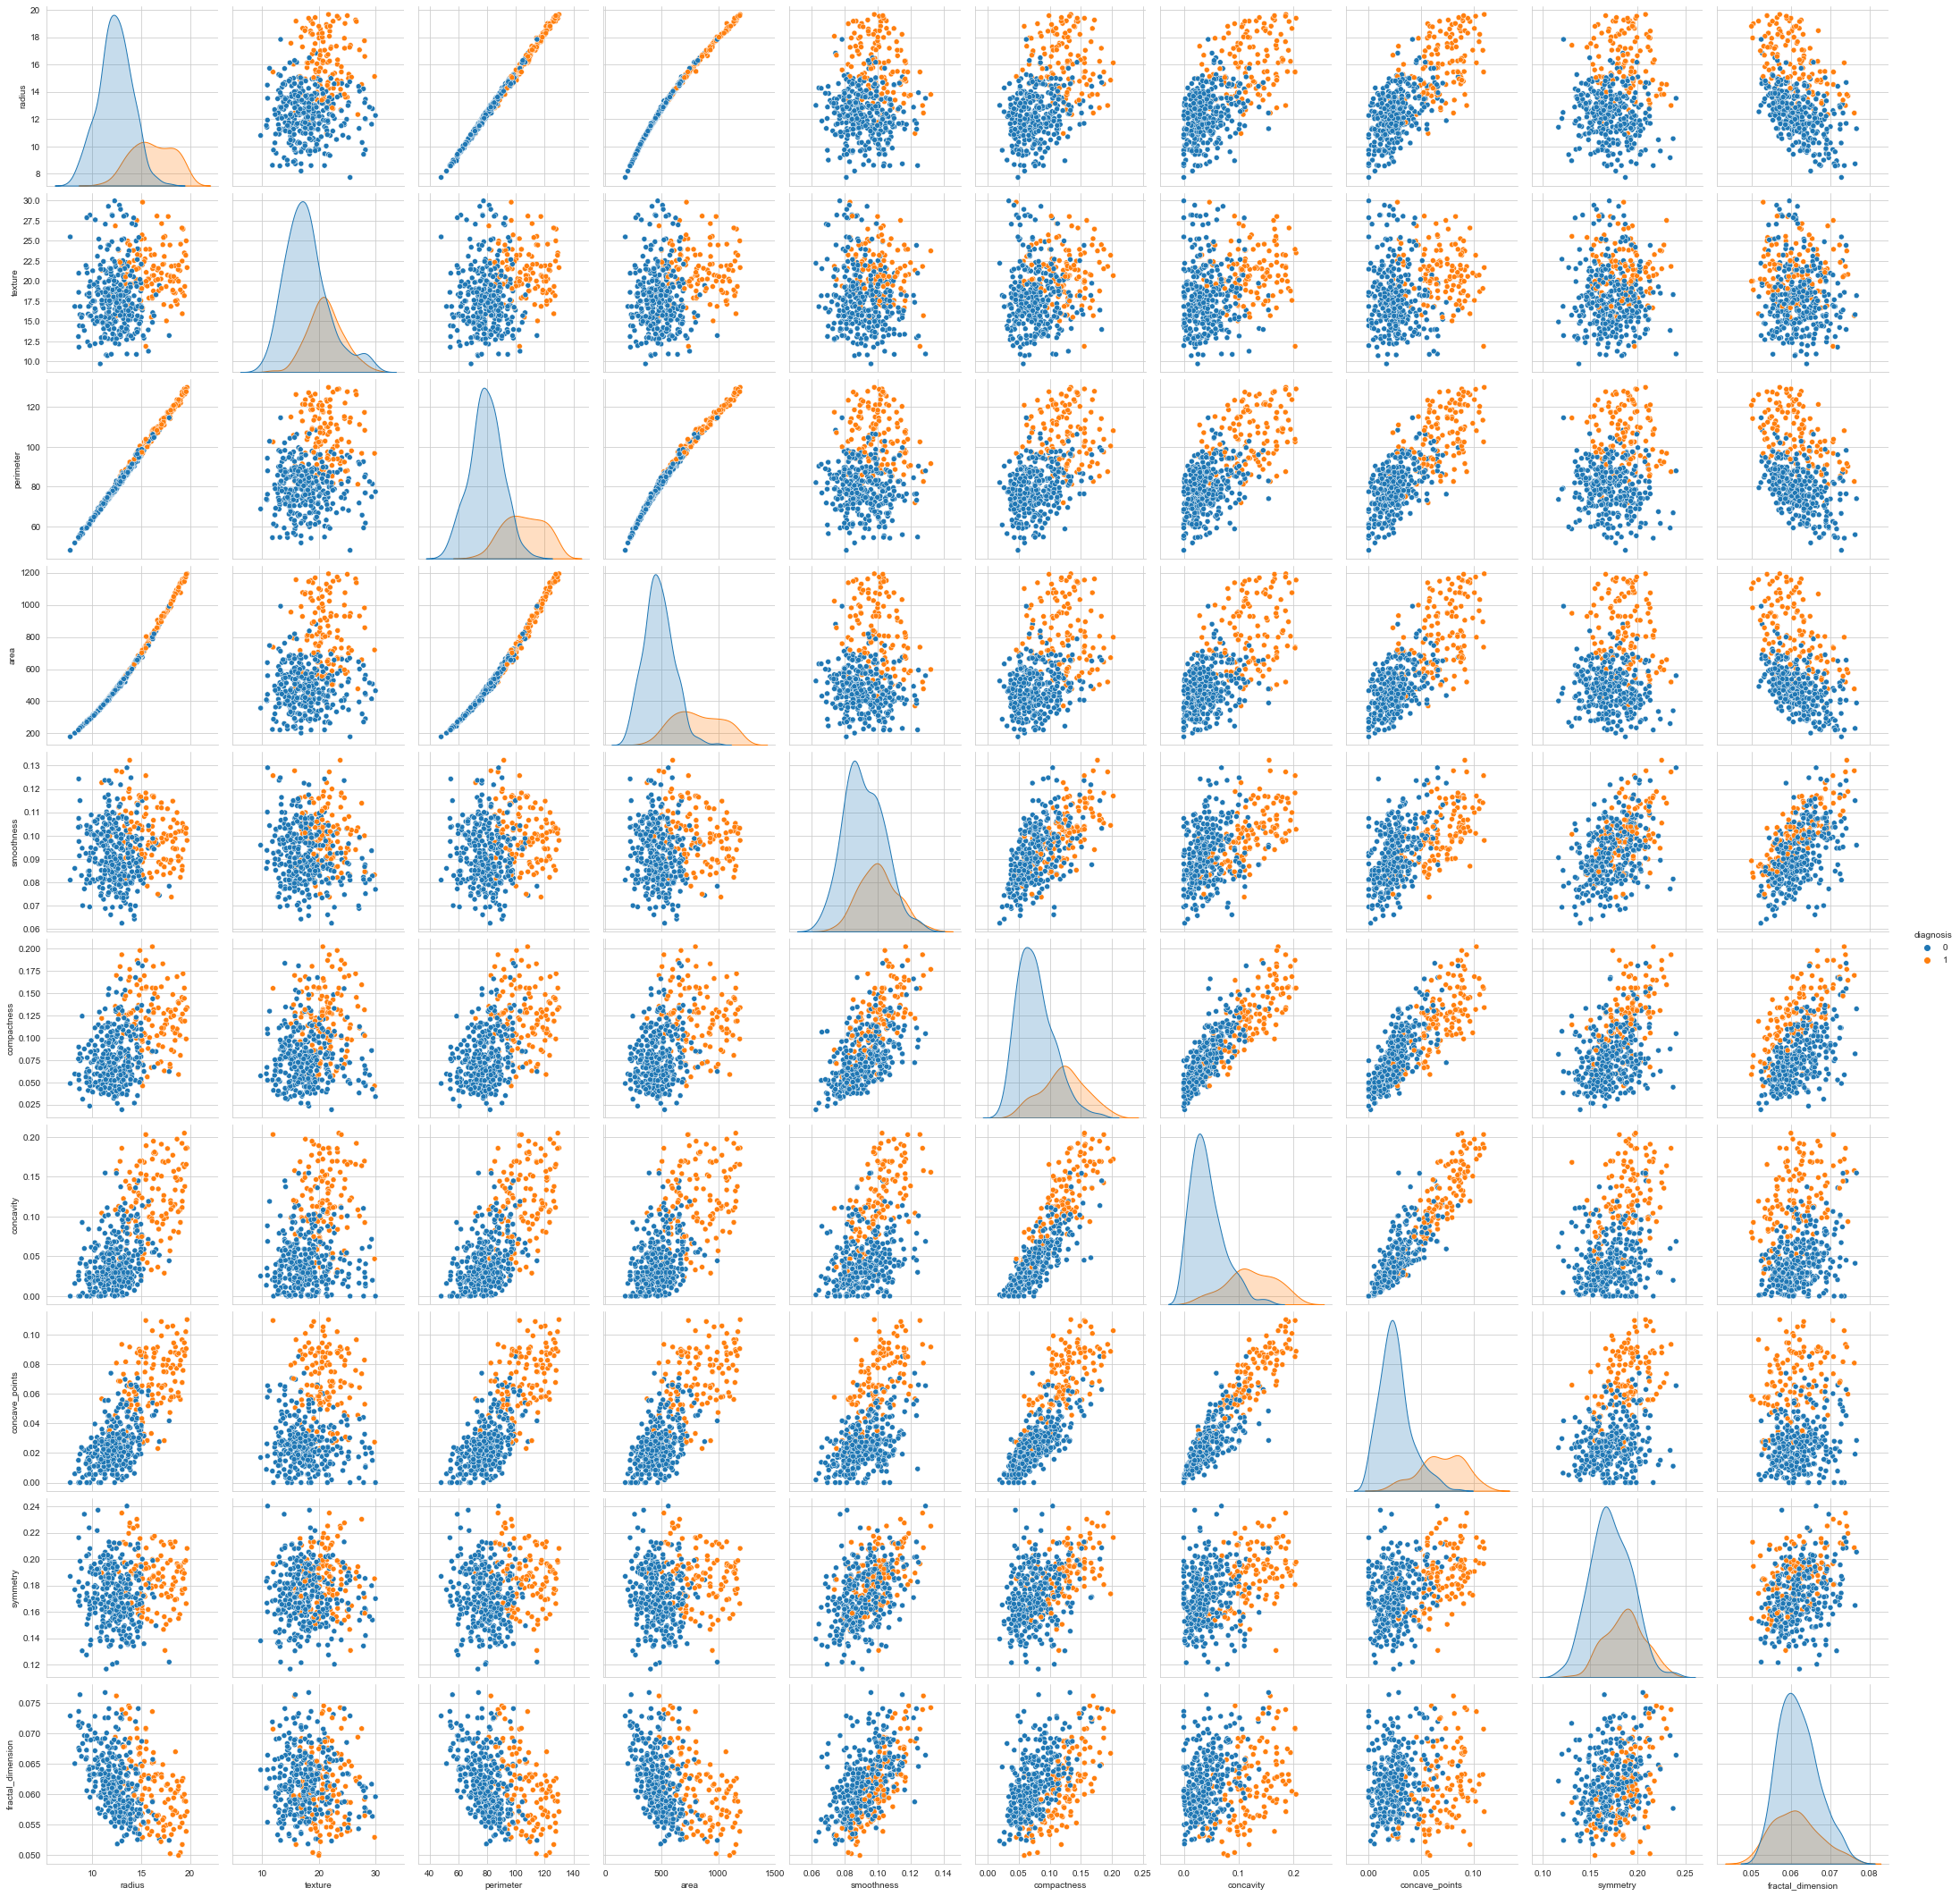

In [24]:
# The result shows that the elbow is 2. The figure actually is quite deceptive due to the scale.
# Explore scattering
sns.set_style("whitegrid")
sns.pairplot(df,hue="diagnosis",size=3);
plt.show()

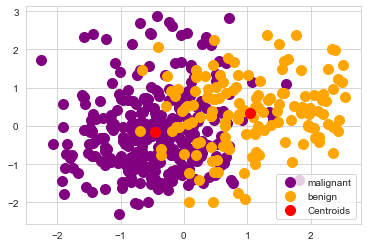

In [25]:
# I will use K-means to implement the clustering, the cluster number is 2.
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
x_scaled = x_scaled.iloc[:, [0, 1, 2, 3,4,5,6,7,8,9]].values
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_scaled_kmeans = kmeans.fit_predict(x_scaled)

#Visualising the clusters
plt.scatter(x_scaled[y_scaled_kmeans == 0, 0], x_scaled[y_scaled_kmeans == 0, 1], s = 100, c = 'purple', label = 'malignant')
plt.scatter(x_scaled[y_scaled_kmeans == 1, 0], x_scaled[y_scaled_kmeans == 1, 1], s = 100, c = 'orange', label = 'benign')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

In [26]:
kmeans.cluster_centers_

array([[-0.4564555 , -0.15457338, -0.47442034, -0.46004193, -0.28348739,
        -0.47753966, -0.52279562, -0.55958316, -0.27155559, -0.07303078],
       [ 1.03680606,  0.3511024 ,  1.07761192,  1.04495239,  0.64392136,
         1.08469723,  1.1874929 ,  1.27105317,  0.61681913,  0.16588421]])

In [27]:
# Computing the mean Silhouette Coefficient of all samples.
from sklearn import metrics
silhouette_avg = metrics.silhouette_score(x_scaled, y_scaled_kmeans)
print ('silhouette coefficient for the above clutering = ', silhouette_avg)

silhouette coefficient for the above clutering =  0.3562110748169059


In [28]:
# Computing the Kmeans score 
kmeans_score = metrics.adjusted_rand_score(y,y_scaled_kmeans)
kmeans_score

0.5840888673221322

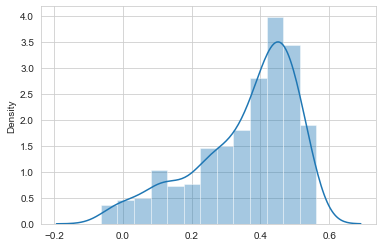

In [29]:
# Since -1 is the worst and +1 is the optimal silhouette score,
# 0.356 means some clusters are separatable while some are sort of mixed. 
# Now I will visualize the distribution of silhouette metrics.
scores = metrics.silhouette_samples(x_scaled, y_scaled_kmeans)
sns.distplot(scores);

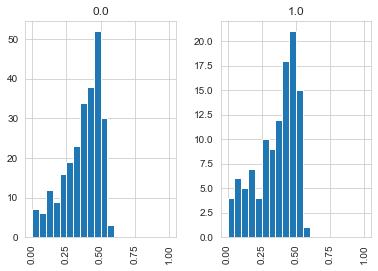

In [30]:
# Explore the distribution of silhouette score for each diagnosis result.
df_scores = pd.DataFrame()
df_scores['SilhouetteScore'] = scores
df_scores['diagnosis'] = df['diagnosis']
df_scores.hist(by='diagnosis', column='SilhouetteScore', range=(0,1.0), bins=20);

In [31]:
# Therefore, when clustering by Kmeans, the two clusters are mixed.
# Now let's explore Guassian Mixture Model.
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2)
gmm.fit(x_scaled)
y_scaled_gmm = gmm.predict(x_scaled)
y_scaled_gmm


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,

In [32]:
# Comparing the GMM prediction with the original labelled species.
gmm_score = metrics.adjusted_rand_score(y,y_scaled_gmm)

In [33]:
gmm_score

0.5376691367487377

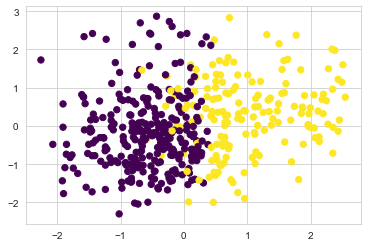

In [34]:
# The result shows that GMM behaves just so-so in clustering the breast cancer.
# Now I will visualize how GMM behaves in clustering the data.
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=y_scaled_gmm, s=40, cmap='viridis');

In [35]:
# The probability of any point belongs to the given cluster.
probs = gmm.predict_proba(x_scaled)
print(probs[:10].round(3))

[[0.002 0.998]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]]


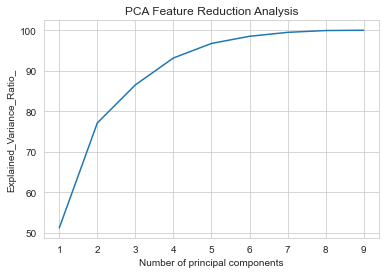

In [102]:
# Now I will apply Principal Component Analysis (PCA) to do some feature reduction.
from sklearn.decomposition import PCA
import matplotlib as mpl

pca_evr = [] # Sum of pac.explained_variance_ratio_

for i in range(1,10):
    pca = PCA(n_components=i, random_state=0)
    pca.fit(x_scaled)
    x_pca_array = pca.transform(x_scaled)
    x_pca = pd.DataFrame(x_pca_array)
    pca_evr.append(100 * np.sum(pca.explained_variance_ratio_[:i]))

plt.plot(range(1, 10), pca_evr)
plt.title('PCA Feature Reduction Analysis')
plt.xlabel('Number of principal components')
plt.ylabel('Explained_Variance_Ratio_') 
plt.show()


In [37]:
# The result above shows that when features = 3, the 3 principal components account for around 87% of the variance. 
# When features = 4, the 4 principal components account for around 93% of the variance,
# Which echoes with the decision tree modeling conclusion that when there are 4 features, the accuarcy and clarity of the tree are preserved.

pca = PCA(n_components=4, random_state=0)
pca.fit(x_scaled)
x_pca_array = pca.transform(x_scaled)
x_pca = pd.DataFrame(x_pca_array,columns=['PC1','PC2','PC3','PC4'])
x_pca.info
print('4 principal components account for {:.4f}% of the variance.'.format(100 * np.sum(pca.explained_variance_ratio_[:4])))

4 principal components account for 93.1592% of the variance.


In [38]:
gmm.fit(x_pca)
y_gmm_pca = gmm.predict(x_pca)
gmm_pca_score = metrics.adjusted_rand_score(y,y_gmm_pca)
gmm_pca_score

0.5902032633427277

In [39]:
y_kmeans_pca = kmeans.fit_predict(x_pca)
kmeans_pca_score = metrics.adjusted_rand_score(y,y_kmeans_pca)
kmeans_pca_score

0.5913682169074074

In [99]:
# Above results show that both k-means and GMM has imporved performance after PCA
# To help understanding the behavior, I will further reduct the components to 2
pca_2 = PCA(n_components=2, random_state=0)
pca_2.fit(x_scaled)
x_pca_array = pca_2.transform(x_scaled)
x_pca_2 = pd.DataFrame(x_pca_array,columns=['PC1','PC2'])
x_pca_2.info
print('2 principal components account for {:.4f}% of the variance.'.format(100 * np.sum(pca_2.explained_variance_ratio_[:2])))

2 principal components account for 77.1337% of the variance.


In [100]:
# GMM performance after PCA
gmm.fit(x_pca_2)
y_gmm_pca_2 = gmm.predict(x_pca_2)
gmm_pca_2_score = metrics.adjusted_rand_score(y,y_gmm_pca_2)
gmm_pca_2_score

0.6174936397595504

In [101]:
# Kmeans performance after PCA
y_kmeans_pca_2 = kmeans.fit_predict(x_pca_2)
kmeans_pca_2_score = metrics.adjusted_rand_score(y,y_kmeans_pca_2)
kmeans_pca_2_score

0.5913682169074074

In [44]:
df_plot = x_pca_2.copy()
df_plot['y_kmeans_pca_2'] = y_kmeans_pca_2
df_plot['y_gmm_pca_2'] = y_gmm_pca_2
df_plot.info

<bound method DataFrame.info of           PC1       PC2       PC3  y_kmeans_pca_2  y_gmm_pca_2
0    2.627744  4.603399 -0.765502               1            0
1    3.578231 -1.824806 -0.339872               1            0
2    2.370401  3.479196  0.465130               1            0
3    3.967871  4.693980  0.715434               1            0
4    0.397658 -2.551055  0.832777               0            1
..        ...       ...       ...             ...          ...
453 -3.155751 -0.039074  2.819501               0            1
454  1.041909 -0.865961  0.964451               1            1
455 -0.415074  0.618023  1.535583               0            1
456  0.630054 -0.371875  1.893328               0            1
457  2.121247 -2.270526  1.958573               1            0

[458 rows x 5 columns]>

In [45]:
# Visualizing the 3d PCA
import plotly as py
import plotly.graph_objs as go

In [46]:
# K_means wrt PC1, PC2, and PC3
trace1 = go.Scatter3d(
    x= df_plot['PC1'],
    y= df_plot['PC2'],
    z= df_plot['PC3'],
    mode='markers',
     marker=dict(
        color = df_plot['y_kmeans_pca_2'], 
        size= 10,
        line=dict(
            color= df_plot['y_kmeans_pca_2'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'K_Means wrt PC1, PC2, and PC3',
    scene = dict(
            xaxis = dict(title  = 'PC1'),
            yaxis = dict(title  = 'PC2'),
            zaxis = dict(title  = 'PC3')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)


In [47]:
# GMM wrt PC1, PC2, and PC3
trace2 = go.Scatter3d(
    x= df_plot['PC1'],
    y= df_plot['PC2'],
    z= df_plot['PC3'],
    mode='markers',
     marker=dict(
        color = df_plot['y_gmm_pca_2'], 
        size= 10,
        line=dict(
            color= df_plot['y_gmm_pca_2'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace2]
layout = go.Layout(
    title= 'GMM wrt PC1, PC2, and PC3',
    scene = dict(
            xaxis = dict(title  = 'PC1'),
            yaxis = dict(title  = 'PC2'),
            zaxis = dict(title  = 'PC3')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)


In [48]:
# Now I will explore ICA with 4 components.
from sklearn.decomposition import FastICA
ndimensions = 4

ica = FastICA(n_components=ndimensions, random_state=0)
ica.fit(x_scaled)
x_ica_array = ica.transform(x_scaled)
x_ica = pd.DataFrame(x_ica_array,columns=['IC1','IC2','IC3','IC4'])
x_ica.info

<bound method DataFrame.info of           IC1       IC2       IC3       IC4
0   -0.040111  0.000767  0.133813  0.058699
1   -0.047216  0.073162 -0.029338 -0.011920
2    0.013989  0.028145  0.112762  0.001591
3    0.017009  0.053513  0.154652  0.010161
4    0.026333  0.039883 -0.072258  0.004950
..        ...       ...       ...       ...
453  0.149664 -0.006052 -0.012698 -0.030533
454  0.031731  0.039496 -0.038795  0.086574
455  0.072273  0.011343 -0.012141  0.119891
456  0.078189  0.046371 -0.020264  0.056137
457  0.064577  0.089574 -0.058487  0.021575

[458 rows x 4 columns]>

In [49]:
df_plot_2 = x_ica.copy()
y_kmeans_ica = kmeans.fit_predict(x_ica)
df_plot_2['y_kmeans_ica'] = y_kmeans_ica
gmm.fit(x_ica)
y_gmm_ica = gmm.predict(x_ica)
df_plot_2['y_gmm_ica'] = y_gmm_ica
df_plot_2.info

<bound method DataFrame.info of           IC1       IC2       IC3       IC4  y_kmeans_ica  y_gmm_ica
0   -0.040111  0.000767  0.133813  0.058699             1          1
1   -0.047216  0.073162 -0.029338 -0.011920             1          1
2    0.013989  0.028145  0.112762  0.001591             1          1
3    0.017009  0.053513  0.154652  0.010161             1          1
4    0.026333  0.039883 -0.072258  0.004950             0          1
..        ...       ...       ...       ...           ...        ...
453  0.149664 -0.006052 -0.012698 -0.030533             0          1
454  0.031731  0.039496 -0.038795  0.086574             0          1
455  0.072273  0.011343 -0.012141  0.119891             0          1
456  0.078189  0.046371 -0.020264  0.056137             0          1
457  0.064577  0.089574 -0.058487  0.021575             1          1

[458 rows x 6 columns]>

In [50]:
# The GMM score after ICA with 4 independent components.
gmm_ica_score = metrics.adjusted_rand_score(y,y_gmm_ica)
gmm_ica_score

0.4421687719867822

In [51]:
# The Kmeans score after ICA with 4 independent components.
kmeans_ica_score = metrics.adjusted_rand_score(y,y_kmeans_ica)
kmeans_ica_score

0.5577247761247961

In [103]:
# Now I will explore ICA with 2 components.
from sklearn.decomposition import FastICA
ndimensions = 2

ica_2 = FastICA(n_components=ndimensions, random_state=0)
ica_2.fit(x_scaled)
x_ica_2_array = ica_2.transform(x_scaled)
x_ica_2 = pd.DataFrame(x_ica_2_array,columns=['IC1','IC2'])
x_ica_2.info

<bound method DataFrame.info of           IC1       IC2
0    0.018371  0.143086
1   -0.090364 -0.009900
2    0.006972  0.112038
3   -0.004438  0.158959
4   -0.043520 -0.060506
..        ...       ...
453  0.056195 -0.032970
454 -0.031083 -0.011348
455  0.016275  0.011428
456 -0.016632 -0.003022
457 -0.070517 -0.035941

[458 rows x 2 columns]>

In [104]:
df_plot_3 = x_ica_2.copy()
y_kmeans_ica_2 = kmeans.fit_predict(x_ica_2)
df_plot_3['y_kmeans_ica_2'] = y_kmeans_ica_2
gmm.fit(x_ica_2)
y_gmm_ica_2 = gmm.predict(x_ica_2)
df_plot_3['y_gmm_ica_2'] = y_gmm_ica_2
df_plot_3.info

<bound method DataFrame.info of           IC1       IC2  y_kmeans_ica_2  y_gmm_ica_2
0    0.018371  0.143086               0            1
1   -0.090364 -0.009900               0            1
2    0.006972  0.112038               0            1
3   -0.004438  0.158959               0            1
4   -0.043520 -0.060506               1            0
..        ...       ...             ...          ...
453  0.056195 -0.032970               1            0
454 -0.031083 -0.011348               0            1
455  0.016275  0.011428               1            0
456 -0.016632 -0.003022               1            1
457 -0.070517 -0.035941               0            1

[458 rows x 4 columns]>

In [105]:
# The GMM score after ICA with 2 independent components.
gmm_ica_2_score = metrics.adjusted_rand_score(y,y_gmm_ica_2)
gmm_ica_2_score

0.4930409646562157

In [106]:
# The Kmeans score after ICA with 2 independent components.
kmeans_ica_2_score = metrics.adjusted_rand_score(y,y_kmeans_ica_2)
kmeans_ica_2_score

0.5642484086517546

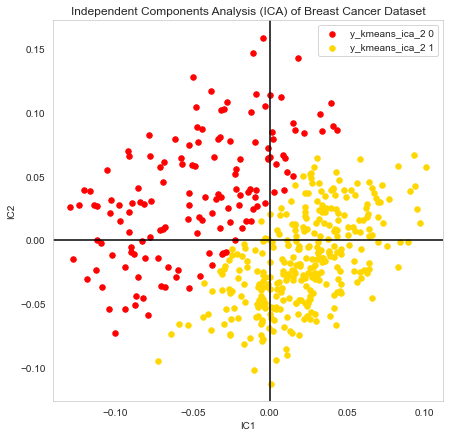

In [110]:
# K_means wrt IC1, IC2
def plotData(df, groupby):
    fig, ax = plt.subplots(figsize = (7,7))
    cmap = mpl.cm.get_cmap('prism')
    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax,
                     kind = 'scatter', 
                     x = 'IC1', y = 'IC2',
                     color = cmap(i/(3-1)),
                     label = "%s %i" % (groupby, i), 
                     s=30) 
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title("Independent Components Analysis (ICA) of Breast Cancer Dataset")

plotData(df_plot_3, 'y_kmeans_ica_2')


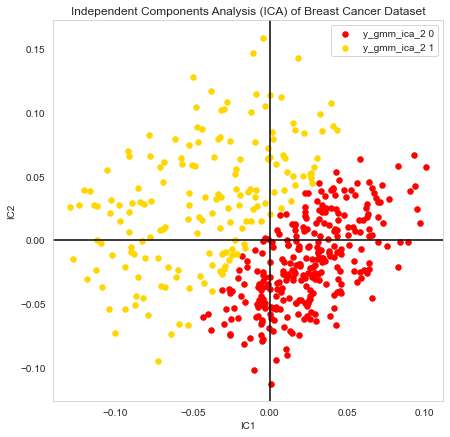

In [111]:
# GMM wrt IC1, IC2
plotData(df_plot_3, 'y_gmm_ica_2')


In [84]:
# Now I will explore TSNE (t-Distributed Stochastic Neighbor Embedding).
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, verbose=1, random_state=42, n_iter=500)
tsne_results = tsne_model.fit_transform(x_scaled)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 458 samples in 0.001s...
[t-SNE] Computed neighbors for 458 samples in 0.013s...
[t-SNE] Computed conditional probabilities for sample 458 / 458
[t-SNE] Mean sigma: 0.955541
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.001434
[t-SNE] KL divergence after 500 iterations: 0.805632


In [85]:
# TSNE
x_tsne = pd.DataFrame(tsne_results, columns=['1','2'])
x_tsne.info

<bound method DataFrame.info of              1          2
0    18.082771   8.027095
1     4.891584  18.500538
2    16.794230   8.114034
3    18.290985   9.558002
4    -8.918533   6.818278
..         ...        ...
453 -19.778648   8.557167
454  -6.008642  10.534240
455   3.534146   0.518138
456  -9.022137  10.520516
457  -0.777631  19.350237

[458 rows x 2 columns]>

In [86]:
df_plot_4 = x_tsne.copy()
y_kmeans_tsne = kmeans.fit_predict(x_tsne)
df_plot_4['y_kmeans_tsne'] = y_kmeans_tsne
gmm.fit(x_tsne)
y_gmm_tsne = gmm.predict(x_tsne)
df_plot_4['y_gmm_tsne'] = y_gmm_tsne
df_plot_4.info

<bound method DataFrame.info of              1          2  y_kmeans_tsne  y_gmm_tsne
0    18.082771   8.027095              1           1
1     4.891584  18.500538              1           1
2    16.794230   8.114034              1           1
3    18.290985   9.558002              1           1
4    -8.918533   6.818278              0           0
..         ...        ...            ...         ...
453 -19.778648   8.557167              0           0
454  -6.008642  10.534240              1           0
455   3.534146   0.518138              0           0
456  -9.022137  10.520516              0           0
457  -0.777631  19.350237              1           1

[458 rows x 4 columns]>

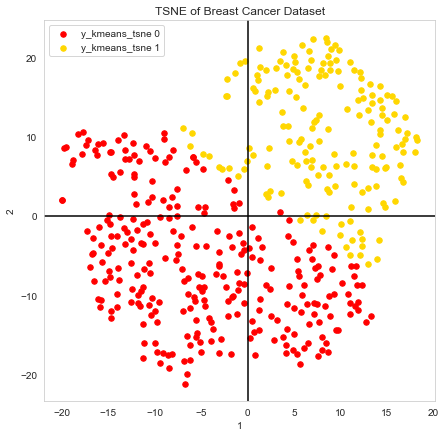

In [91]:
# Kmeans wrt tsne1, tsne2, and tsne3
#trace2 = go.Scatter2d(
#    x= df_plot_4['1'],
#    y= df_plot_4['2'],
#    z= df_plot_4['3'],
#    mode='markers',
#     marker=dict(
#        color = df_plot_4['y_kmeans_tsne'], 
#        size= 10,
#        line=dict(
#            color= df_plot_4['y_kmeans_tsne'],
#            width= 12
#        ),
 #       opacity=0.8
#     )
#)
#data = [trace2]
#layout = go.Layout(
#    title= 'Kmeans wrt tsne1, tsne2, and tsne3',
#    scene = dict(
#            xaxis = dict(title  = 'tsne1'),
#            yaxis = dict(title  = 'tsne2'),
#            zaxis = dict(title  = 'tsne3')
#        )
#)
#fig = go.Figure(data=data, layout=layout)
#py.offline.iplot(fig)
#
def plotData(df, groupby):
    fig, ax = plt.subplots(figsize = (7,7))
    cmap = mpl.cm.get_cmap('prism')
    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax,
                     kind = 'scatter', 
                     x = '1', y = '2',
                     color = cmap(i/(3-1)),
                     label = "%s %i" % (groupby, i), 
                     s=30) 
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title("TSNE of Breast Cancer Dataset")

plotData(df_plot_4, 'y_kmeans_tsne')

In [92]:
# The Kmeans score after TSNE with 2 components.
kmeans_tsne_score = metrics.adjusted_rand_score(y,y_kmeans_tsne)
kmeans_tsne_score

0.421593544774092

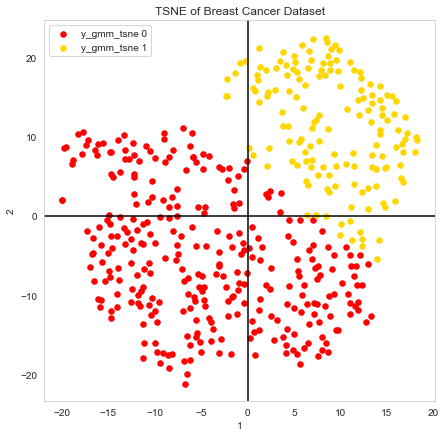

In [93]:
# GMM wrt tsne1, tsne2, and tsne3
#trace2 = go.Scatter3d(
#    x= df_plot_4['1'],
#    y= df_plot_4['2'],
#    #z= df_plot_4['3'],
#    mode='markers',
#     marker=dict(
#        color = df_plot_4['y_gmm_tsne'], 
#        size= 10,
#        line=dict(
#            color= df_plot_4['y_gmm_tsne'],
#            width= 12
#        ),
#        opacity=0.8
#     )
#)
#data = [trace2]
#layout = go.Layout(
#    title= 'Kmeans wrt tsne1, tsne2, and tsne3',
#    scene = dict(
#            xaxis = dict(title  = 'tsne1'),
#            yaxis = dict(title  = 'tsne2'),
#            #zaxis = dict(title  = 'tsne3')
#        )
#)
#fig = go.Figure(data=data, layout=layout)
#py.offline.iplot(fig)

plotData(df_plot_4, 'y_gmm_tsne')

In [94]:
# The GMM score after TSNE with 2 components.
gmm_tsne_score = metrics.adjusted_rand_score(y,y_gmm_tsne)
gmm_tsne_score

0.540134373434388

In [107]:
x_kurtosis=x_ica_2.iloc[:, [0, 1]].values
x_kurtosis

array([[ 1.83707458e-02,  1.43085811e-01],
       [-9.03641703e-02, -9.89990834e-03],
       [ 6.97182997e-03,  1.12038120e-01],
       [-4.43818730e-03,  1.58958754e-01],
       [-4.35196456e-02, -6.05056092e-02],
       [-4.58198282e-02,  1.81810664e-02],
       [-6.06743527e-02, -2.88463319e-02],
       [-2.78309172e-02,  1.08441620e-01],
       [-2.62993419e-02, -1.58468190e-02],
       [-5.00007873e-02,  1.28350495e-01],
       [-4.64112202e-03, -7.73512573e-04],
       [ 2.15884845e-02,  5.03709213e-02],
       [ 7.69898546e-02,  3.21521546e-02],
       [-6.86994465e-02,  6.14226163e-02],
       [-2.95264844e-02,  1.02509904e-01],
       [-1.02452599e-01, -1.23116524e-02],
       [-5.26134034e-02,  7.44159275e-02],
       [-6.93003887e-02,  8.38908565e-03],
       [-1.14284025e-01,  2.74126099e-02],
       [-5.04186863e-02,  5.89653054e-02],
       [-7.10618314e-02,  8.08568859e-03],
       [-2.71168485e-02,  2.51702528e-02],
       [ 8.37894377e-03, -4.73906994e-02],
       [-2.

In [108]:
import scipy.stats as stats
from scipy.stats import kurtosis
kurtosis(x_kurtosis)

array([0.01642512, 0.03445901])